# **Wood study clustering**

### **Data preperation and initial clustering**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from numpy import arange

import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import sklearn.metrics as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

ModuleNotFoundError: No module named 'numpy'

Below we have the dataset that we will be using for the clustering of the wood study. We again are using the margin between profit and loss, the percentage of time each participant choose the beneficial cards. We were able to add a column based on the age category of the participant also as each participant falls into two groups "18-40" and "61-88". After these steps we were able to categorise each subject into cluster based on their metrics. 

In [2]:
clustering = pd.read_csv('Data\clustering.csv')
cluster = KMeans(n_clusters = 4)
cols = clustering.columns[:]
clustering.drop(clustering.columns[[0]], axis = 1, inplace = True)
y_predicted = cluster.fit_predict(clustering[["Difference","Total-B/D"]])
clustering["cluster"] = y_predicted
clustering.head()

,Subjects,Difference,Total-B/D,Study,AgeProfile,cluster
0,Subj_317,-320,56.0,Wood,Young,2
1,Subj_318,-1030,63.0,Wood,Young,2
2,Subj_319,-1850,59.0,Wood,Young,0
3,Subj_320,-775,54.0,Wood,Young,2
4,Subj_321,-1600,65.0,Wood,Young,0


Here we have the inital clustering based on the profit/loss difference and the percentage of beneficial cards picked. As you can see there are a lot of outliers in the data, the four clusters are very distinct and clear. An interesting oberservation is that the majority of the subjects that picked B/D gained the most money but on the other hand they also lost the most money.

Text(0, 0.5, 'Total-B/D')

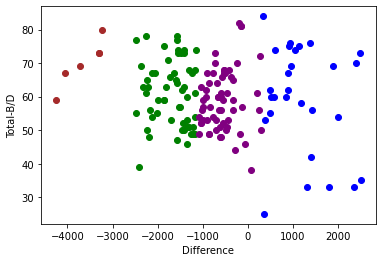

In [3]:
df1 = clustering[clustering.cluster==0]
df2 = clustering[clustering.cluster==1]
df3 = clustering[clustering.cluster==2]
df4 = clustering[clustering.cluster==3]

plt.scatter(df1.Difference, df1["Total-B/D"], color='green')
plt.scatter(df2.Difference, df2["Total-B/D"], color='blue')
plt.scatter(df3.Difference, df3["Total-B/D"], color='purple')
plt.scatter(df4.Difference, df4["Total-B/D"], color='brown')

plt.xlabel("Difference")
plt.ylabel("Total-B/D")

### **Normalization and refined clustering**

In [4]:
clustering[['Difference','Total-B/D']] = minmax_scale(clustering[['Difference','Total-B/D']])

In [5]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(clustering[["Difference", "Total-B/D"]])

In [6]:
clustering["cluster"] = y_predicted
clustering.head()

,Subjects,Difference,Total-B/D,Study,AgeProfile,cluster
0,Subj_317,0.582222,0.525424,Wood,Young,1
1,Subj_318,0.477037,0.644068,Wood,Young,1
2,Subj_319,0.355556,0.576271,Wood,Young,1
3,Subj_320,0.514815,0.491525,Wood,Young,1
4,Subj_321,0.392593,0.677966,Wood,Young,3


The array below has the centroids of our revised cluster

In [7]:
km.cluster_centers_

array([[0.68977366, 0.74952919],
       [0.48145145, 0.49175447],
       [0.84861111, 0.1970339 ],
       [0.32556614, 0.7535109 ]])

Now we have our revised cluster, with centroids added for extra insight. This cluster makes our previous doubts a little clearer. The subjects that rarely chose B/D lost the greatest money as shown below. Also although the B/D cards were clearly the most beneficial cards they too had a chance of a major loss, which can be seen from the particpants in the top left of our below cluster.

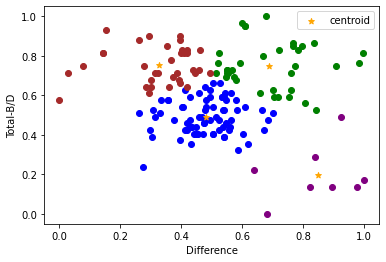

In [8]:
df1 = clustering[clustering.cluster==0]
df2 = clustering[clustering.cluster==1]
df3 = clustering[clustering.cluster==2]
df4 = clustering[clustering.cluster==3]

plt.scatter(df1.Difference, df1["Total-B/D"], color='green')
plt.scatter(df2.Difference, df2["Total-B/D"], color='blue')
plt.scatter(df3.Difference, df3["Total-B/D"], color='purple')
plt.scatter(df4.Difference, df4["Total-B/D"], color='brown')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="orange", marker="*", label="centroid")

plt.xlabel("Difference")
plt.ylabel("Total-B/D")
plt.legend()

### **Further analysis**

In [9]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(clustering[["Difference", "Total-B/D"]])
    sse.append(km.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Our elbow graph does not have a dictinct breaking point. The optimum number of clusters is in the region of 3 and 4.

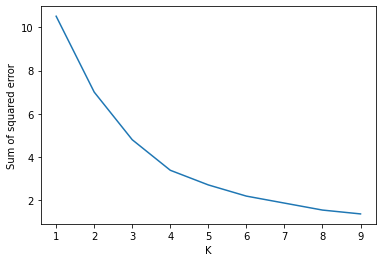

In [10]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)
#This is indictaing that the optimum number of clusters is 4 but 3 is also a reasonable choice

Lastly I wanted to briefly touch on the performance of the different ages. The scatterplot below shows us that the older participants were the bigger lossers but also the biggest gainers. Some of the older participants were blind to the pattern of the B/D cards where others were very quick to realise the two cards that were benfitting them. The younger group were in general more near the mean of the total study.

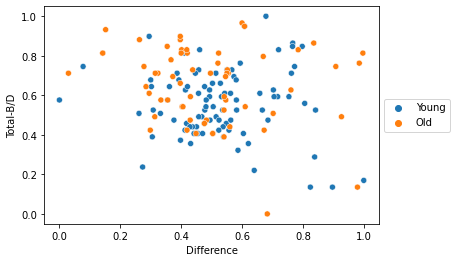

In [11]:
sns.scatterplot(data=clustering, x="Difference", y="Total-B/D", hue="AgeProfile")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))